# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv', index_col = [0])

/var/folders/vz/fg98vjhj7zgcl_xkny2c0vn80000gp/T/ipykernel_1227/2353684699.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv('loan_data_2007_2014.csv', index_col = [0])


In [4]:
loan_data = loan_data_backup.copy()

## Explore Data

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_data['dti_joint'].unique()

array([nan])

In [7]:
# Displays all column names.
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

/var/folders/vz/fg98vjhj7zgcl_xkny2c0vn80000gp/T/ipykernel_1227/1861337868.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')


In [10]:
loan_data['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length_int'].apply(lambda x: x if x != 'n/a' else 0)

In [12]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [13]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [14]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],format='%b-%y')

In [15]:
loan_data['mnths_since_earliest_cr_line_date']  = round((pd.to_datetime('2022-10-02') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,"M"))

In [16]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mnths_since_earliest_cr_line_date']][loan_data['mnths_since_earliest_cr_line_date'] < 0]

,earliest_cr_line,earliest_cr_line_date,mnths_since_earliest_cr_line_date
1580,Sep-62,2062-09-01,-479.0
1770,Sep-68,2068-09-01,-551.0
2799,Sep-64,2064-09-01,-503.0
3282,Sep-67,2067-09-01,-539.0
3359,Feb-65,2065-02-01,-508.0
...,...,...,...
464003,Jan-68,2068-01-01,-543.0
464260,Jul-66,2066-07-01,-525.0
465100,Oct-67,2067-10-01,-540.0
465500,Sep-67,2067-09-01,-539.0


In [17]:
loan_data['mnths_since_earliest_cr_line_date'][loan_data['mnths_since_earliest_cr_line_date'] < 0] = loan_data['mnths_since_earliest_cr_line_date'].max()

/var/folders/vz/fg98vjhj7zgcl_xkny2c0vn80000gp/T/ipykernel_1227/3404421069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mnths_since_earliest_cr_line_date'][loan_data['mnths_since_earliest_cr_line_date'] < 0] = loan_data['mnths_since_earliest_cr_line_date'].max()


In [18]:
min(loan_data['mnths_since_earliest_cr_line_date'])

131.0

In [19]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format="%b-%y")

In [20]:
loan_data['mnths_since_issue_date'] = round((pd.to_datetime('2017-12-01') - loan_data['issue_d_date'])/np.timedelta64(1,'M'))

In [21]:
loan_data['mnths_since_issue_date'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mnths_since_issue_date, dtype: float64

#### discrete values encoding


In [22]:
loan_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [23]:
pd.get_dummies(loan_data['grade'],prefix ="grade", prefix_sep=":")

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [24]:
loan_data_dummies = [ pd.get_dummies(loan_data['grade'],prefix ="grade", prefix_sep=":"),
                    pd.get_dummies(loan_data['sub_grade'],prefix ="sub_grade", prefix_sep=":"),
                    pd.get_dummies(loan_data['home_ownership'],prefix ="home_ownership", prefix_sep=":"),
                    pd.get_dummies(loan_data['verification_status'],prefix ="verification_status", prefix_sep=":"),
                    pd.get_dummies(loan_data['loan_status'],prefix ="loan_status", prefix_sep=":"),
                    pd.get_dummies(loan_data['purpose'],prefix ="purpose", prefix_sep=":"),
                    pd.get_dummies(loan_data['addr_state'],prefix ="addr_state", prefix_sep=":"),
                    pd.get_dummies(loan_data['initial_list_status'],prefix ="initial_list_status", prefix_sep=":")
                                   ]

In [25]:
load_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [26]:
loan_data = pd.concat([loan_data, load_data_dummies], axis = 1)

In [27]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [28]:
for i in loan_data.columns.values:
    if(i.startswith("int")):
        print(i)

int_rate


In [29]:
loan_data['emp_length_int'].isnull().sum()

21008

In [30]:
# Replace values of relevant variablesl
loan_data['mnths_since_earliest_cr_line_date'].fillna(0,inplace = True)
loan_data['delinq_2yrs'].fillna(0,inplace = True)
loan_data['acc_now_delinq'].fillna(0,inplace = True)
loan_data['total_acc'].fillna(0,inplace = True)
loan_data['pub_rec'].fillna(0,inplace = True)
loan_data['open_acc'].fillna(0,inplace = True)
loan_data['inq_last_6mths'].fillna(0,inplace = True)
loan_data['emp_length_int'].fillna(0,inplace = True)

In [31]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [32]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Default','Charged Off','Late (31-120 days)',
       'Does not meet the credit policy. Status:Charged Off']),0,1)

#### split data

In [33]:
loan_train_data, loan_test_data, loan_target_train, loan_target_test = train_test_split(loan_data.drop('good_bad',axis = 1),loan_data['good_bad'], random_state = 43, test_size = 0.2)

In [34]:
df_inputs_preps = loan_train_data
df_targets_preps = loan_target_train

In [35]:
def woe_discrete(df, discrete_variable, target_variable):
    df = pd.concat([df[discrete_variable],target_variable], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean() ], axis =1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs','prop_good']
    df['props_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df.sort_values(['WoE'], inplace = True)
    df.reset_index(drop=True)
    df['diff_prop_good']  = df['prop_good'].diff().abs()
    df['diff_woe'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [36]:
df_temp = woe_discrete(df_inputs_preps,'home_ownership',df_targets_preps)
df_temp

,home_ownership,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
2,OTHER,145,0.772414,0.000389,112.0,33.0,0.000337,0.000809,-0.875781,NaN,NaN,0.022401
1,NONE,35,0.800000,0.000094,28.0,7.0,0.000084,0.000172,-0.711478,0.027586,0.164303,0.022401
4,RENT,150731,0.873689,0.404074,131692.0,19039.0,0.396363,0.466905,-0.163796,0.073689,0.547682,0.022401
3,OWN,33411,0.891503,0.089567,29786.0,3625.0,0.089649,0.088898,0.008412,0.017814,0.172208,0.022401
0,MORTGAGE,188706,0.904227,0.505876,170633.0,18073.0,0.513567,0.443216,0.147323,0.012724,0.138912,0.022401


In [37]:
def plot_by_woe(df_WOE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WOE.iloc[:,0].apply(str))
    y = df_WOE['WoE']
    plt.figure(figsize=(16,6))
    plt.plot(x,y,marker ='o', linestyle ='--', color ='k')
    plt.xlabel(df_WOE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(f'Weight of Evidence by {df_WOE.columns[0]}')
    plt.xticks(rotation = rotation_of_x_axis_labels)

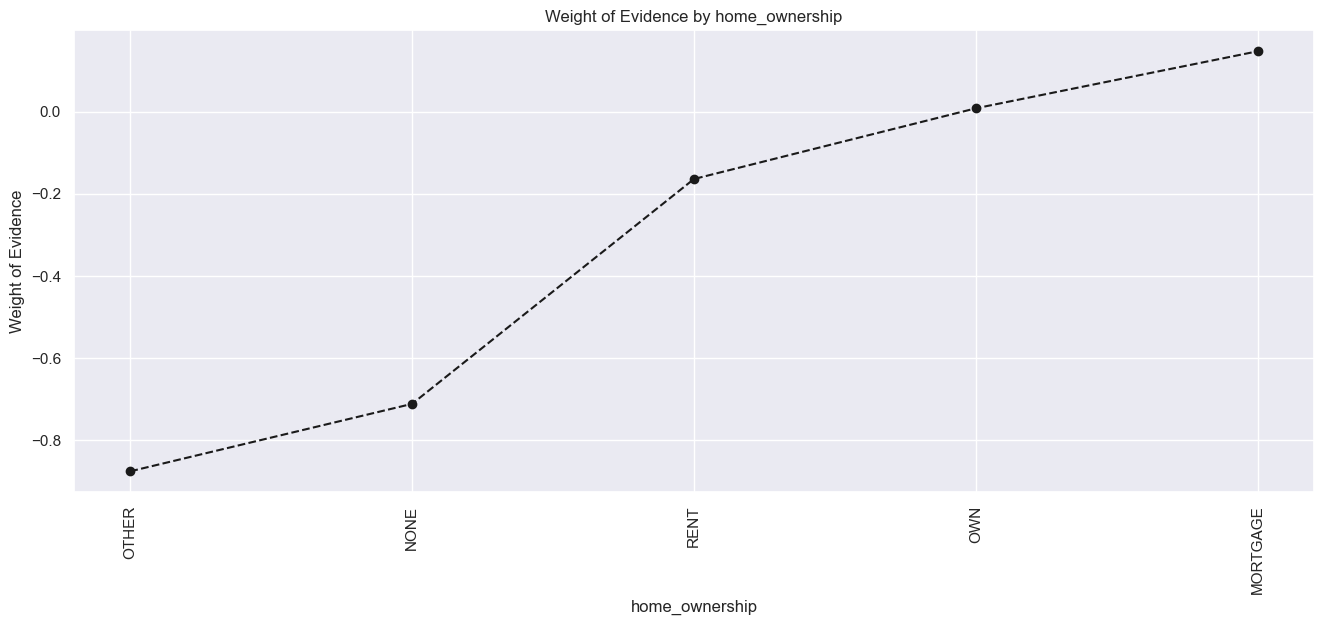

In [38]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [39]:
# combine some dummy variables with less significance

df_inputs_preps['home_ownership:OTHER_NONE_RENT_ANY'] = sum([df_inputs_preps['home_ownership:ANY'],df_inputs_preps['home_ownership:OTHER'],df_inputs_preps['home_ownership:RENT'],df_inputs_preps['home_ownership:NONE']])

In [40]:
df_temp = woe_discrete(df_inputs_preps,'addr_state',df_targets_preps)
df_temp

,addr_state,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
28,NE,13,0.384615,0.000035,5.0,8.0,0.000015,0.000196,-2.567776,NaN,NaN,inf
12,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893800,0.384615,1.673976,inf
32,NV,5184,0.862847,0.013897,4473.0,711.0,0.013463,0.017436,-0.258630,0.093616,0.635169,inf
9,FL,25358,0.874675,0.067979,22180.0,3178.0,0.066757,0.077936,-0.154834,0.011827,0.103797,inf
1,AL,4675,0.875080,0.012533,4091.0,584.0,0.012313,0.014322,-0.151129,0.000406,0.003705,inf
11,HI,1949,0.879425,0.005225,1714.0,235.0,0.005159,0.005763,-0.110773,0.004345,0.040356,inf
18,LA,4342,0.881621,0.011640,3828.0,514.0,0.011521,0.012605,-0.089898,0.002196,0.020875,inf
33,NY,32252,0.882922,0.086460,28476.0,3776.0,0.085706,0.092601,-0.077376,0.001301,0.012522,inf
30,NJ,14297,0.884731,0.038327,12649.0,1648.0,0.038071,0.040415,-0.059757,0.001809,0.017619,inf
3,AZ,8498,0.885149,0.022781,7522.0,976.0,0.022640,0.023935,-0.055648,0.000418,0.004109,inf


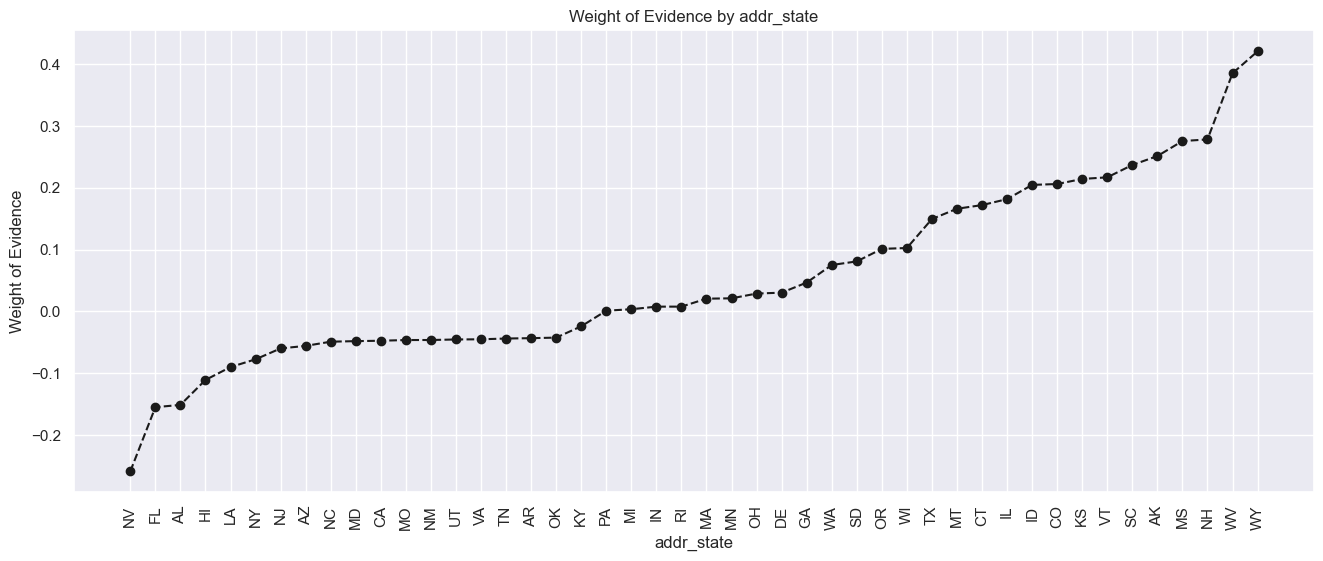

In [41]:
plot_by_woe(df_temp.iloc[2:-2,:], rotation_of_x_axis_labels=90)

In [42]:
if 'addr_state:ND' in df_inputs_preps.columns.values:
    pass
else:
    df_inputs_preps['addr_state:ND'] = 0

In [43]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.


df_inputs_preps['addr_state:ND_NE_IA_NV_FL_HI_AL']= sum([df_inputs_preps['addr_state:ND'],df_inputs_preps['addr_state:NE'],df_inputs_preps['addr_state:IA']
                                                         ,df_inputs_preps['addr_state:NV'],df_inputs_preps['addr_state:FL'],df_inputs_preps['addr_state:HI'],df_inputs_preps['addr_state:AL']])

In [44]:


df_inputs_preps['addr_state:NM_VA']= sum([df_inputs_preps['addr_state:NM'],df_inputs_preps['addr_state:VA']])
df_inputs_preps['addr_state:NY']= sum([df_inputs_preps['addr_state:NY']])
df_inputs_preps['addr_state:OK_TN_MO_LA_MD_NC']= sum([df_inputs_preps['addr_state:OK'],df_inputs_preps['addr_state:TN'],df_inputs_preps['addr_state:MO']
                                                         ,df_inputs_preps['addr_state:LA'],df_inputs_preps['addr_state:MD'],df_inputs_preps['addr_state:NC']])
df_inputs_preps['addr_state:CA']= sum([df_inputs_preps['addr_state:CA']])

df_inputs_preps['addr_state:UT_KY_AZ_NJ']= sum([df_inputs_preps['addr_state:UT'],df_inputs_preps['addr_state:KY'],df_inputs_preps['addr_state:AZ']
                                                         ,df_inputs_preps['addr_state:NJ']])

df_inputs_preps['addr_state:AR_MI_PA_OH_MN']= sum([df_inputs_preps['addr_state:AR'],df_inputs_preps['addr_state:MI'],df_inputs_preps['addr_state:PA']
                                                         ,df_inputs_preps['addr_state:OH'],df_inputs_preps['addr_state:MN']])

df_inputs_preps['addr_state:RI_MA_DE_SD_IN']= sum([df_inputs_preps['addr_state:RI'],df_inputs_preps['addr_state:MA'],df_inputs_preps['addr_state:DE']
                                                         ,df_inputs_preps['addr_state:SD'],df_inputs_preps['addr_state:IN']])

df_inputs_preps['addr_state:GA_WA_OR']= sum([df_inputs_preps['addr_state:GA'],df_inputs_preps['addr_state:WA'],df_inputs_preps['addr_state:OR']
                                                         ])

df_inputs_preps['addr_state:WI_MT']= sum([df_inputs_preps['addr_state:WI'],df_inputs_preps['addr_state:MT']
                                                         ])
df_inputs_preps['addr_state:TX']= sum([df_inputs_preps['addr_state:TX']])
df_inputs_preps['addr_state:IL_CT']= sum([df_inputs_preps['addr_state:IL'],df_inputs_preps['addr_state:CT']])


df_inputs_preps['addr_state:KS_SC_CO_VT_AK_MS']= sum([df_inputs_preps['addr_state:KS'],df_inputs_preps['addr_state:SC'],df_inputs_preps['addr_state:CO']
                                                         ,df_inputs_preps['addr_state:VT'],df_inputs_preps['addr_state:AK'],df_inputs_preps['addr_state:MS']])
                                          
df_inputs_preps['addr_state:WV_NH_WY_DC_ME_ID']= sum([df_inputs_preps['addr_state:WV'],df_inputs_preps['addr_state:NH'],df_inputs_preps['addr_state:WY']
                                                         ,df_inputs_preps['addr_state:DC'],df_inputs_preps['addr_state:ME'],df_inputs_preps['addr_state:ID']])

In [45]:
# verification_status
# purpose
# initial_list_status

df_temp = woe_discrete(df_inputs_preps,'verification_status',df_targets_preps)
df_temp

,verification_status,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
2,Verified,134503,0.872850,0.360571,117401.0,17102.0,0.353350,0.419403,-0.171373,NaN,NaN,0.020215
1,Source Verified,120057,0.895966,0.321844,107567.0,12490.0,0.323752,0.306300,0.055413,0.023116,0.226786,0.020215
0,Not Verified,118468,0.905586,0.317585,107283.0,11185.0,0.322897,0.274297,0.163124,0.009620,0.107711,0.020215


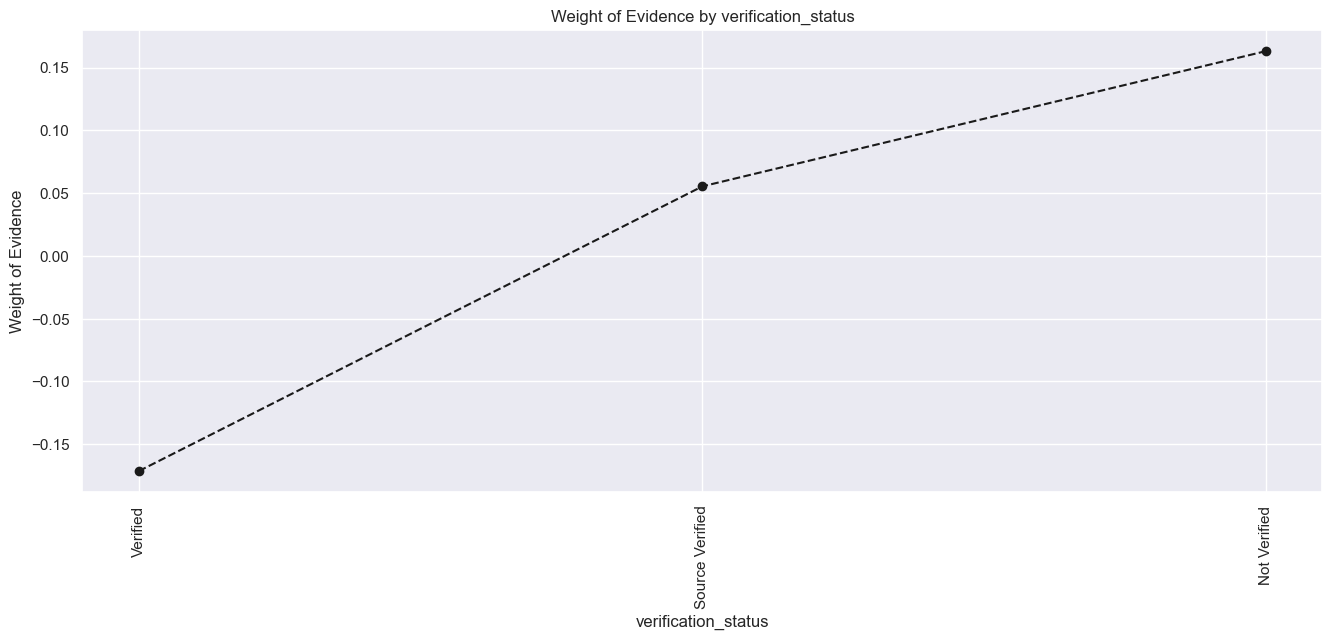

In [46]:
plot_by_woe(df_temp, rotation_of_x_axis_labels=90)

In [47]:

df_temp = woe_discrete(df_inputs_preps,'purpose',df_targets_preps)
df_temp

,purpose,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
11,small_business,5600,0.782321,0.015012,4381.0,1219.0,0.013186,0.029894,-0.818526,NaN,NaN,0.037101
3,educational,346,0.791908,0.000928,274.0,72.0,0.000825,0.001766,-0.761311,0.009586,0.057216,0.037101
8,moving,2444,0.848609,0.006552,2074.0,370.0,0.006242,0.009074,-0.374041,0.056701,0.387269,0.037101
10,renewable_energy,291,0.852234,0.000780,248.0,43.0,0.000746,0.001055,-0.345544,0.003625,0.028497,0.037101
5,house,1811,0.854224,0.004855,1547.0,264.0,0.004656,0.006474,-0.329649,0.001991,0.015895,0.037101
9,other,18979,0.861795,0.050878,16356.0,2623.0,0.049228,0.064325,-0.267496,0.007570,0.062152,0.037101
7,medical,3673,0.869044,0.009846,3192.0,481.0,0.009607,0.011796,-0.205237,0.007250,0.062260,0.037101
12,vacation,1985,0.876071,0.005321,1739.0,246.0,0.005234,0.006033,-0.142039,0.007026,0.063198,0.037101
13,wedding,1873,0.881474,0.005021,1651.0,222.0,0.004969,0.005444,-0.091313,0.005403,0.050725,0.037101
2,debt_consolidation,219139,0.886917,0.587460,194358.0,24781.0,0.584973,0.607720,-0.038148,0.005443,0.053166,0.037101


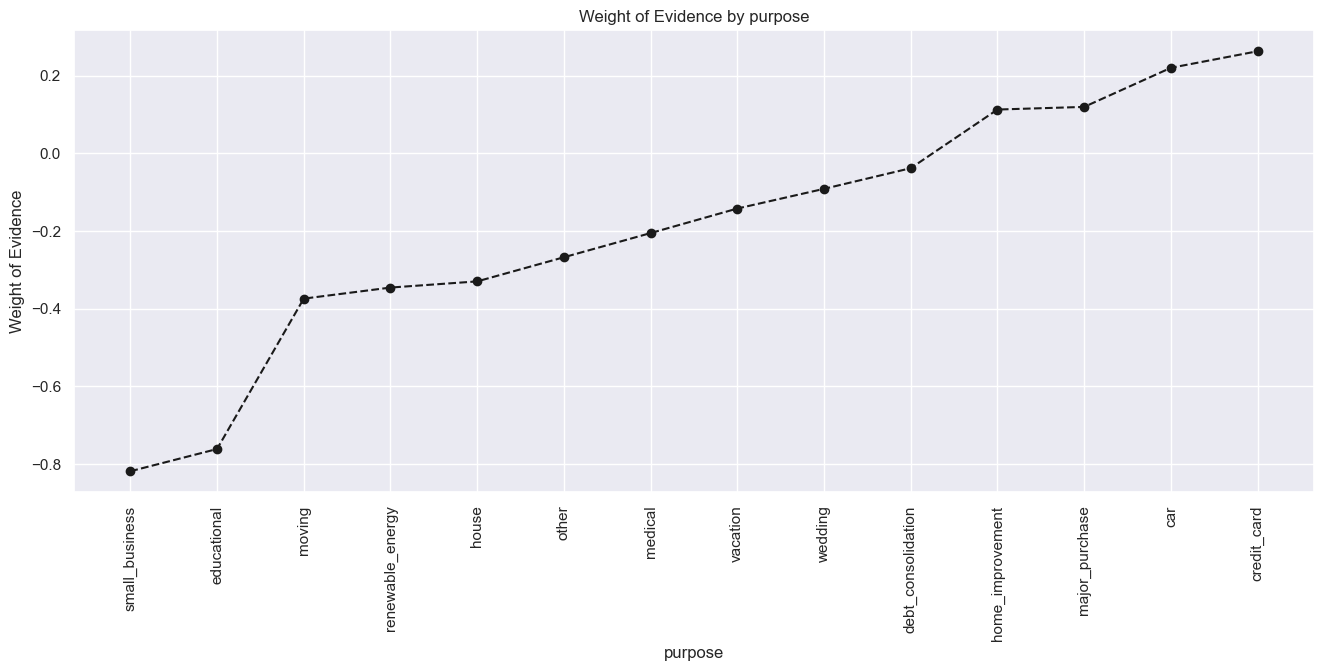

In [48]:
plot_by_woe(df_temp.iloc[:,:], rotation_of_x_axis_labels=90)

In [49]:
df_inputs_preps.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID
153300,3927572,5020669,16000,16000,15975.0,60 months,24.70,466.82,G,G1,...,0,0,0,0,0,0,0,0,0,0
378895,17633466,19765999,7000,7000,7000.0,36 months,8.39,220.62,A,A5,...,0,0,1,0,0,0,0,0,0,0
311758,23603490,25976383,5950,5950,5950.0,36 months,15.61,208.05,D,D1,...,0,0,0,0,0,0,0,0,0,0
363142,19607414,21830119,15000,15000,15000.0,36 months,6.03,456.54,A,A1,...,0,0,0,0,0,0,0,0,0,0
66298,8275488,1498515,6400,6400,6400.0,36 months,9.67,205.52,B,B1,...,0,1,0,0,0,0,0,0,0,0


In [50]:
# combine some dummy vars ---> purpose

df_inputs_preps['purpose:sm_edu_mov_re_hs']= sum([df_inputs_preps['purpose:small_business'],df_inputs_preps['purpose:educational'],df_inputs_preps['purpose:moving'],df_inputs_preps['purpose:renewable_energy'],df_inputs_preps['purpose:house']])
df_inputs_preps['purpose:me_vc_we']= sum([df_inputs_preps['purpose:medical'],df_inputs_preps['purpose:vacation'],df_inputs_preps['purpose:wedding'],df_inputs_preps['purpose:renewable_energy'],df_inputs_preps['purpose:house']])
df_inputs_preps['purpose:he_mp_car']= sum([df_inputs_preps['purpose:home_improvement'],df_inputs_preps['purpose:major_purchase'],df_inputs_preps['purpose:car']])

In [51]:
df_temp = woe_discrete(df_inputs_preps,'initial_list_status',df_targets_preps)
df_temp

,initial_list_status,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
0,f,242238,0.879445,0.649383,213035.0,29203.0,0.641187,0.716164,-0.110587,NaN,NaN,0.025866
1,w,130790,0.911507,0.350617,119216.0,11574.0,0.358813,0.283836,0.234403,0.032062,0.344991,0.025866


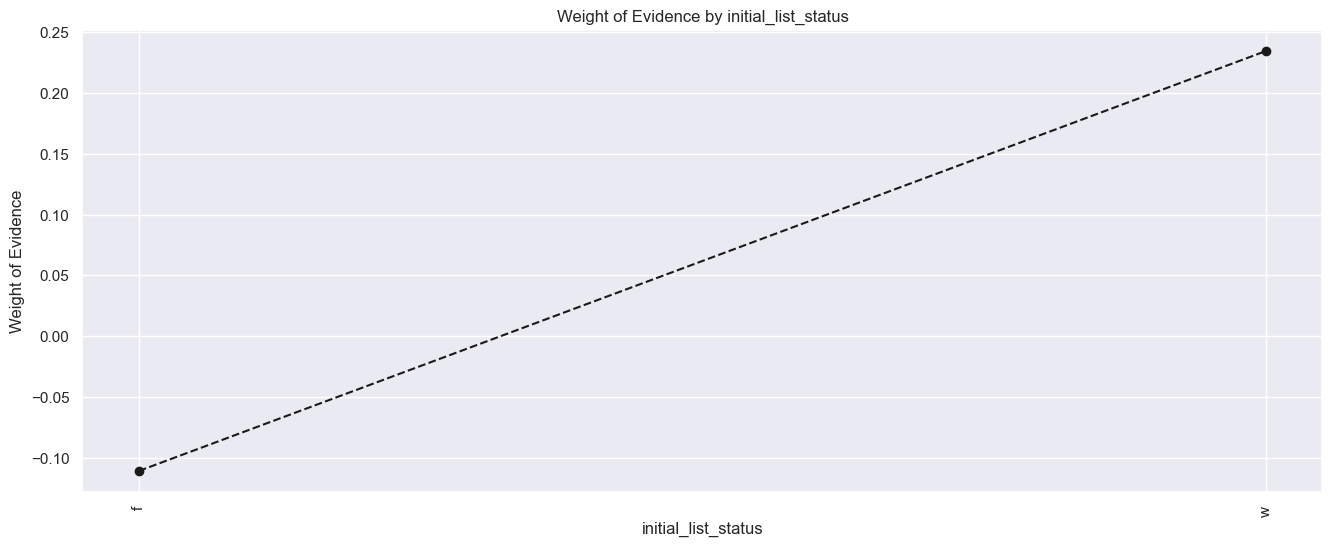

In [52]:
plot_by_woe(df_temp.iloc[:,:], rotation_of_x_axis_labels=90)

### preprocessing --> continuous variables 

In [53]:
def woe_continuous_ordered(df, discrete_variable, target_variable):
    df = pd.concat([df[discrete_variable],target_variable], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean() ], axis =1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs','prop_good']
    df['props_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good']/df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad']/df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    # df.sort_values(['WoE'], inplace = True)
    # df.reset_index(drop=True)
    df['diff_prop_good']  = df['prop_good'].diff().abs()
    df['diff_woe'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [54]:
df_inputs_preps['term_int'].unique()

array([60, 36])

In [55]:
df_tempc =woe_continuous_ordered(df_inputs_preps,'term_int',df_targets_preps)

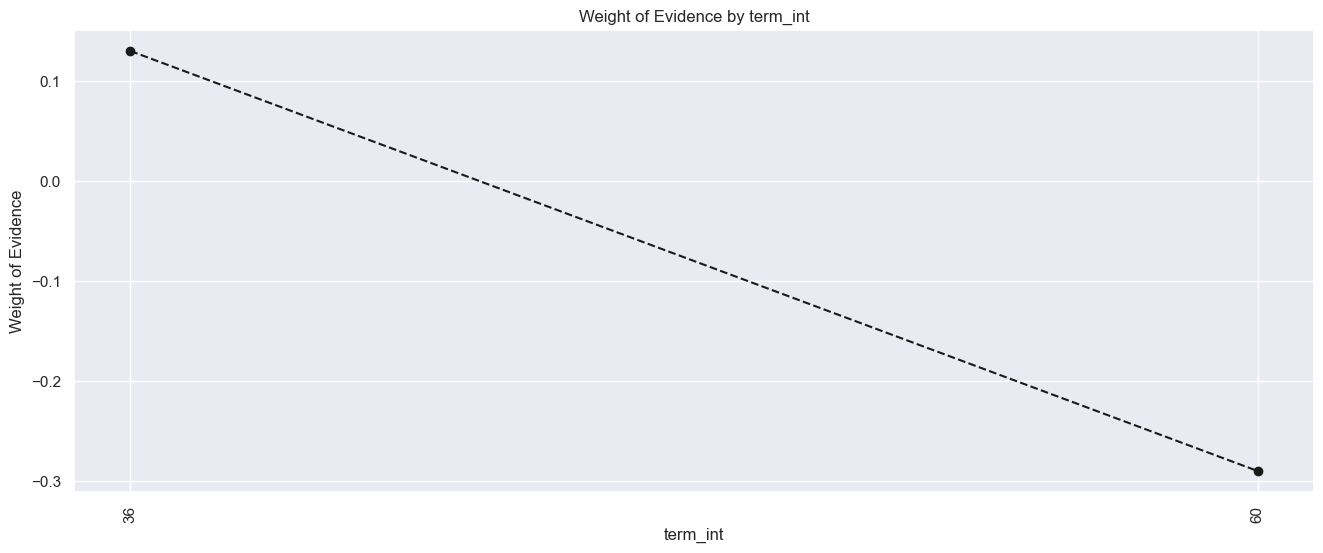

In [56]:
plot_by_woe(df_tempc, rotation_of_x_axis_labels=90)

In [57]:
df_inputs_preps['term:36'] = np.where((df_inputs_preps['term_int'] == 36 ),1,0)
df_inputs_preps['term:60'] = np.where((df_inputs_preps['term_int'] == 60 ),1,0)

In [58]:
df_tempc =woe_continuous_ordered(df_inputs_preps,'emp_length_int',df_targets_preps)
df_tempc

,emp_length_int,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
0,0.0,45930,0.876508,0.123127,40258.0,5672.0,0.121167,0.139098,-0.138006,NaN,NaN,0.006971
1,1.0,23664,0.887889,0.063438,21011.0,2653.0,0.063238,0.065061,-0.028417,0.011381,0.109588,0.006971
2,2.0,33077,0.889893,0.088672,29435.0,3642.0,0.088593,0.089315,-0.008121,0.002005,0.020296,0.006971
3,3.0,29213,0.891863,0.078313,26054.0,3159.0,0.078417,0.077470,0.012143,0.001970,0.020264,0.006971
4,4.0,22379,0.887484,0.059993,19861.0,2518.0,0.059777,0.061750,-0.032479,0.004379,0.044623,0.006971
5,5.0,24705,0.883627,0.066228,21830.0,2875.0,0.065703,0.070505,-0.070540,0.003857,0.038061,0.006971
6,6.0,20924,0.883149,0.056092,18479.0,2445.0,0.055618,0.059960,-0.075183,0.000478,0.004643,0.006971
7,7.0,20938,0.887430,0.056130,18581.0,2357.0,0.055925,0.057802,-0.033023,0.004281,0.042160,0.006971
8,8.0,17895,0.890360,0.047972,15933.0,1962.0,0.047955,0.048115,-0.003344,0.002931,0.029678,0.006971
9,9.0,14359,0.888850,0.038493,12763.0,1596.0,0.038414,0.039140,-0.018723,0.001510,0.015378,0.006971


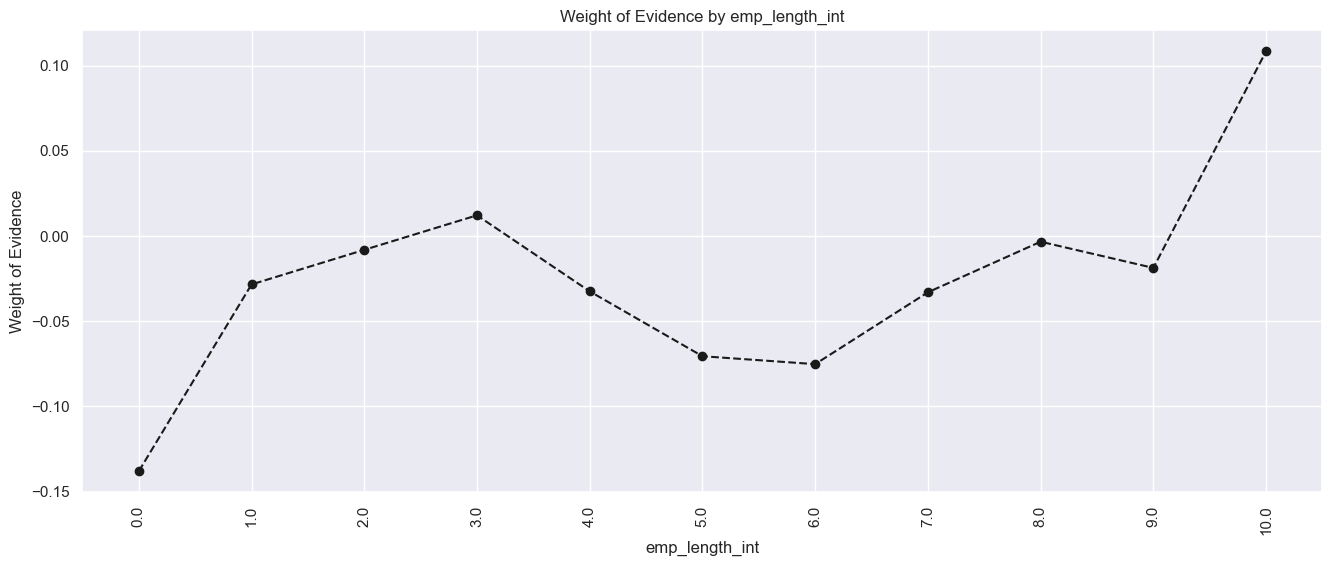

In [59]:
plot_by_woe(df_tempc, rotation_of_x_axis_labels=90)

In [60]:
df_inputs_preps['emp_length_int:0'] = np.where((df_inputs_preps['emp_length_int'].isin([0])),1,0)
df_inputs_preps['emp_length_int:2-4'] = np.where((df_inputs_preps['emp_length_int'].isin(range(2,5))),1,0)
df_inputs_preps['emp_length_int:5-6'] = np.where((df_inputs_preps['emp_length_int'].isin(range(5,7))),1,0)
df_inputs_preps['emp_length_int:7-9'] = np.where((df_inputs_preps['emp_length_int'].isin(range(7,10))),1,0)
df_inputs_preps['emp_length_int:10'] = np.where((df_inputs_preps['emp_length_int'].isin([10])),1,0)

In [61]:
df_inputs_preps.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [62]:
df_inputs_preps.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [63]:
df_inputs_preps['mnths_since_issue_date_factor'] = pd.cut(df_inputs_preps['mnths_since_issue_date'],50)

In [64]:
df_inputs_preps['mnths_since_issue_date_factor'].head()

153300    (55.8, 57.6]
378895    (41.4, 43.2]
311758    (37.8, 39.6]
363142    (39.6, 41.4]
66298     (48.6, 50.4]
Name: mnths_since_issue_date_factor, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [65]:
df_tempc = woe_continuous_ordered(df_inputs_preps,'mnths_since_issue_date_factor',df_targets_preps)


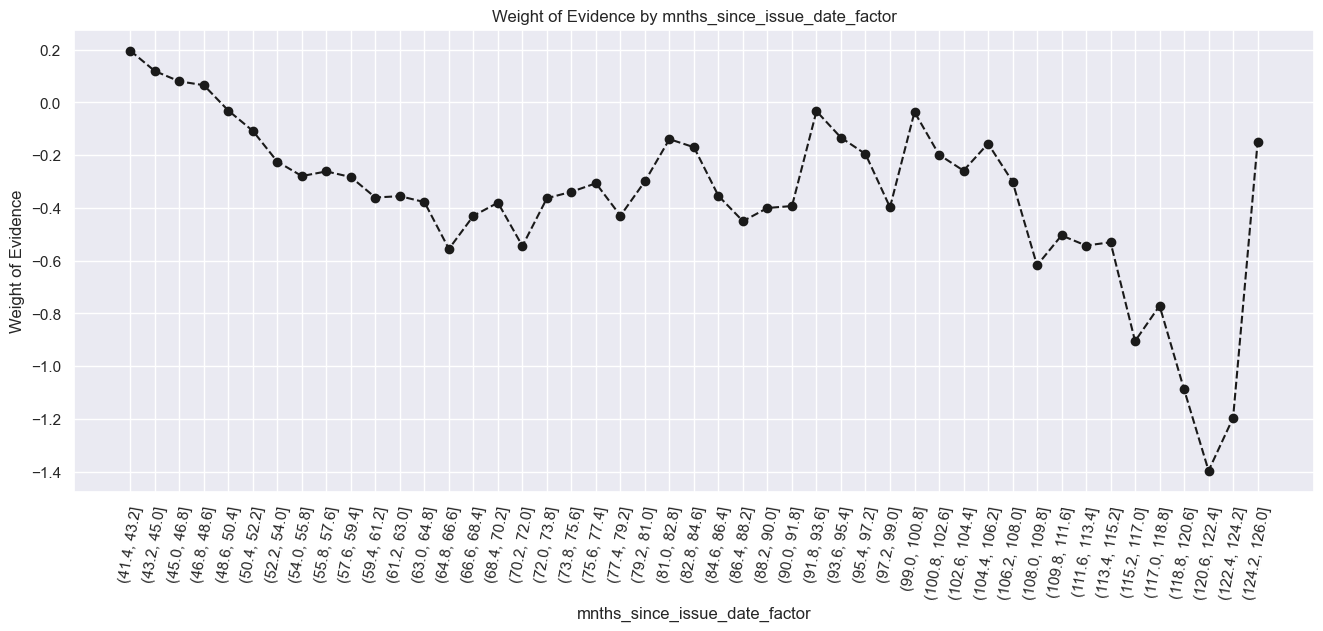

In [66]:
plot_by_woe(df_tempc.iloc[3:,:], rotation_of_x_axis_labels=80)

In [67]:
df_inputs_preps['mnths_since_issue_date_factor:<38'] = np.where((df_inputs_preps['mnths_since_issue_date'].isin(range(38))),1,0)
df_inputs_preps['mnths_since_issue_date_factor:38-39'] = np.where((df_inputs_preps['mnths_since_issue_date'].isin(range(38,40))),1,0)
df_inputs_preps['mnths_since_issue_date_factor:40-41'] = np.where((df_inputs_preps['mnths_since_issue_date'].isin(range(40,42))),1,0)
df_inputs_preps['mnths_since_issue_date_factor:42-48'] = np.where((df_inputs_preps['mnths_since_issue_date'].isin(range(42,49))),1,0)
df_inputs_preps['mnths_since_issue_date_factor:49-52'] = np.where((df_inputs_preps['mnths_since_issue_date'].isin(range(49,53))),1,0)
df_inputs_preps['mnths_since_issue_date_factor:53-64'] = np.where((df_inputs_preps['mnths_since_issue_date'].isin(range(53,65))),1,0)
df_inputs_preps['mnths_since_issue_date_factor:65-84'] = np.where((df_inputs_preps['mnths_since_issue_date'].isin(range(65,85))),1,0)
df_inputs_preps['mnths_since_issue_date_factor:>84'] = np.where((df_inputs_preps['mnths_since_issue_date'].isin(range(85,int(df_inputs_preps['mnths_since_issue_date'].max())))),1,0)

In [68]:
df_inputs_preps['int_rate']

153300    24.70
378895     8.39
311758    15.61
363142     6.03
66298      9.67
          ...  
387349    19.52
40753     12.53
248063    12.39
150848    21.98
276292    13.98
Name: int_rate, Length: 373028, dtype: float64

In [69]:
df_inputs_preps['int_rate_factor'] = pd.cut(df_inputs_preps['int_rate'], 50)

In [78]:
df_tempc = woe_continuous_ordered(df_inputs_preps,'int_rate_factor',df_targets_preps)
# df_tempc

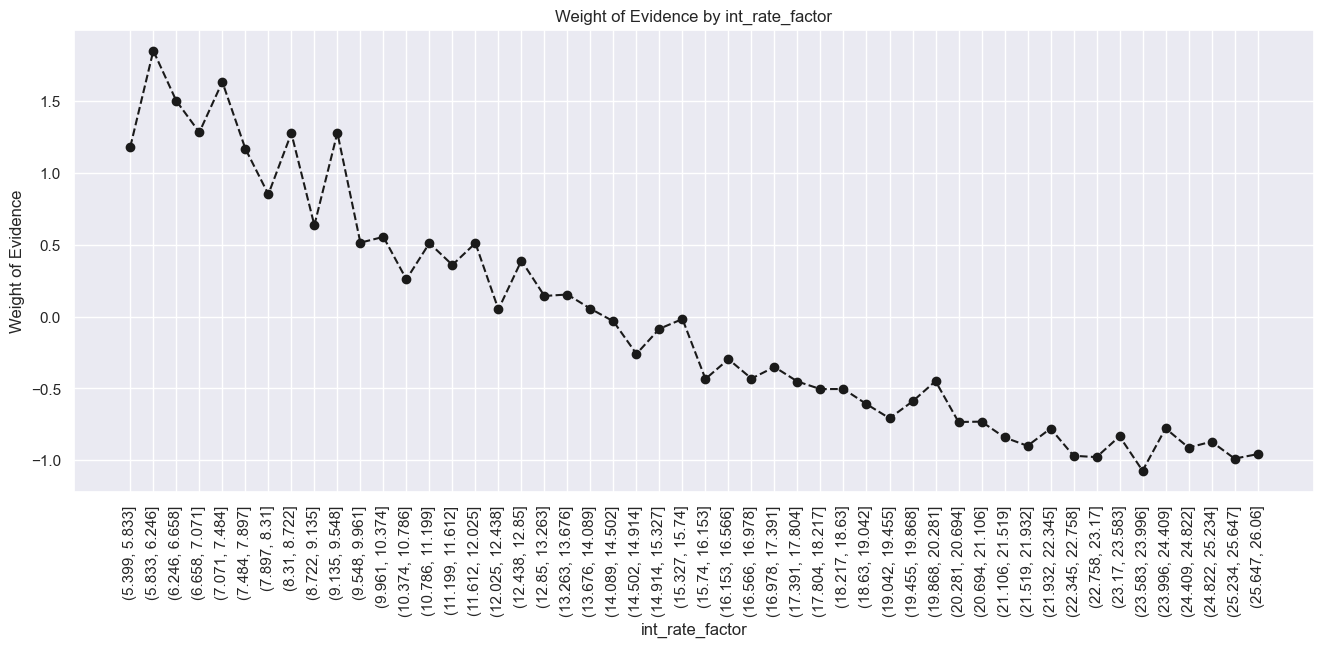

In [71]:
plot_by_woe(df_tempc,rotation_of_x_axis_labels=90)

In [76]:
df_inputs_preps['int_rate:<9.548'] = np.where((df_inputs_preps['int_rate'] <= 9.548),1,0)
df_inputs_preps['int_rate:9.548-12.025'] = np.where((df_inputs_preps['int_rate'] > 9.548) & (df_inputs_preps['int_rate'] <= 12.025),1,0)
df_inputs_preps['int_rate:12.025-15.74'] = np.where((df_inputs_preps['int_rate'] > 12.025) & (df_inputs_preps['int_rate'] <= 15.74),1,0)
df_inputs_preps['int_rate:15.74-20.281'] = np.where((df_inputs_preps['int_rate'] > 15.74) & (df_inputs_preps['int_rate'] <= 20.281),1,0)
df_inputs_preps['int_rate:>20.281'] = np.where((df_inputs_preps['int_rate'] > 20.281),1,0)

In [90]:
for i in loan_data.columns.values:
    if(i.startswith("in")):
        print(i)

int_rate
installment
inq_last_6mths
initial_list_status
inq_fi
inq_last_12m
initial_list_status:f
initial_list_status:w


In [82]:
df_inputs_preps['mnths_since_earliest_cr_line_date'].max()

645.0

In [83]:
df_inputs_preps['mnths_since_earliest_cr_line_date_factor'] = pd.cut(df_inputs_preps['mnths_since_earliest_cr_line_date'],50)
df_inputs_preps['mnths_since_earliest_cr_line_date_factor']

153300    (219.3, 232.2]
378895    (180.6, 193.5]
311758    (296.7, 309.6]
363142    (541.8, 554.7]
66298     (245.1, 258.0]
               ...      
387349    (258.0, 270.9]
40753     (296.7, 309.6]
248063    (348.3, 361.2]
150848    (206.4, 219.3]
276292    (245.1, 258.0]
Name: mnths_since_earliest_cr_line_date_factor, Length: 373028, dtype: category
Categories (50, interval[float64, right]): [(-0.645, 12.9] < (12.9, 25.8] < (25.8, 38.7] < (38.7, 51.6] ... (593.4, 606.3] < (606.3, 619.2] < (619.2, 632.1] < (632.1, 645.0]]

In [87]:
# mths_since_earliest_cr_line

df_tempc = woe_continuous_ordered(df_inputs_preps,'mnths_since_earliest_cr_line_date_factor',df_targets_preps)
df_tempc

,mnths_since_earliest_cr_line_date_factor,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
0,"(-0.645, 12.9]",23,0.869565,0.000062,20.0,3.0,0.000060,0.000074,-0.200653,NaN,NaN,0.016146
1,"(12.9, 25.8]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146
2,"(25.8, 38.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146
3,"(38.7, 51.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146
4,"(51.6, 64.5]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146
5,"(64.5, 77.4]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146
6,"(77.4, 90.3]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146
7,"(90.3, 103.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146
8,"(103.2, 116.1]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146
9,"(116.1, 129.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016146


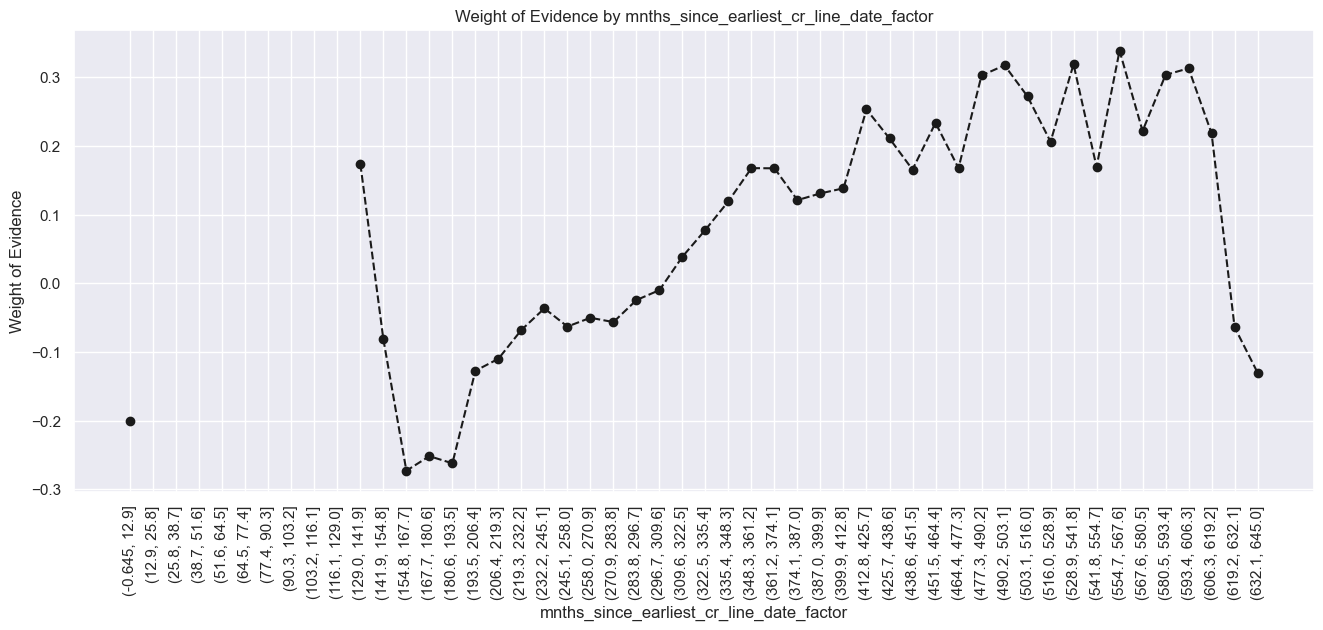

In [86]:
plot_by_woe(df_tempc,rotation_of_x_axis_labels=90)

In [88]:
df_inputs_preps['mnths_since_earliest_cr_line_date:<141.9'] = np.where((df_inputs_preps['mnths_since_earliest_cr_line_date'] < 141.9),1,0)
df_inputs_preps['mnths_since_earliest_cr_line_date:141.9-154.8'] = np.where((df_inputs_preps['mnths_since_earliest_cr_line_date'] > 141.9) & (df_inputs_preps['mnths_since_earliest_cr_line_date'] <= 154.8),1,0)
df_inputs_preps['mnths_since_earliest_cr_line_date:154.8-193.5'] = np.where((df_inputs_preps['mnths_since_earliest_cr_line_date'] > 154.8) & (df_inputs_preps['mnths_since_earliest_cr_line_date'] <= 193.5),1,0)
df_inputs_preps['mnths_since_earliest_cr_line_date:193.5-309.6'] = np.where((df_inputs_preps['mnths_since_earliest_cr_line_date'] > 193.5) & (df_inputs_preps['mnths_since_earliest_cr_line_date'] <= 309.6),1,0)
df_inputs_preps['mnths_since_earliest_cr_line_date:309.6-412.8'] = np.where((df_inputs_preps['mnths_since_earliest_cr_line_date'] > 309.6) & (df_inputs_preps['mnths_since_earliest_cr_line_date'] <= 412.8),1,0)
df_inputs_preps['mnths_since_earliest_cr_line_date:>412.8'] = np.where((df_inputs_preps['mnths_since_earliest_cr_line_date'] > 412.8),1,0)

In [94]:
df_inputs_preps['installment_factor'] = pd.cut(df_inputs_preps['installment'],50)

In [95]:
df_tempc = woe_continuous_ordered(df_inputs_preps,'installment_factor',df_targets_preps)
df_tempc

,installment_factor,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
0,"(14.276, 43.556]",1842,0.897937,0.004938,1654.0,188.0,0.004978,0.004610,0.076737,NaN,NaN,0.013816
1,"(43.556, 71.443]",4915,0.898881,0.013176,4418.0,497.0,0.013297,0.012188,0.087080,0.000944,0.010342,0.013816
2,"(71.443, 99.329]",6888,0.892131,0.018465,6145.0,743.0,0.018495,0.018221,0.014925,0.006750,0.072154,0.013816
3,"(99.329, 127.216]",9221,0.891660,0.024719,8222.0,999.0,0.024746,0.024499,0.010041,0.000471,0.004884,0.013816
4,"(127.216, 155.102]",10093,0.893986,0.027057,9023.0,1070.0,0.027157,0.026240,0.034346,0.002326,0.024304,0.013816
5,"(155.102, 182.988]",16758,0.897064,0.044924,15033.0,1725.0,0.045246,0.042303,0.067248,0.003078,0.032903,0.013816
6,"(182.988, 210.875]",17040,0.906397,0.045680,15445.0,1595.0,0.046486,0.039115,0.172639,0.009333,0.105391,0.013816
7,"(210.875, 238.761]",15085,0.901624,0.040439,13601.0,1484.0,0.040936,0.036393,0.117630,0.004773,0.055009,0.013816
8,"(238.761, 266.648]",18773,0.898578,0.050326,16869.0,1904.0,0.050772,0.046693,0.083748,0.003046,0.033881,0.013816
9,"(266.648, 294.534]",20081,0.891141,0.053832,17895.0,2186.0,0.053860,0.053609,0.004675,0.007437,0.079073,0.013816


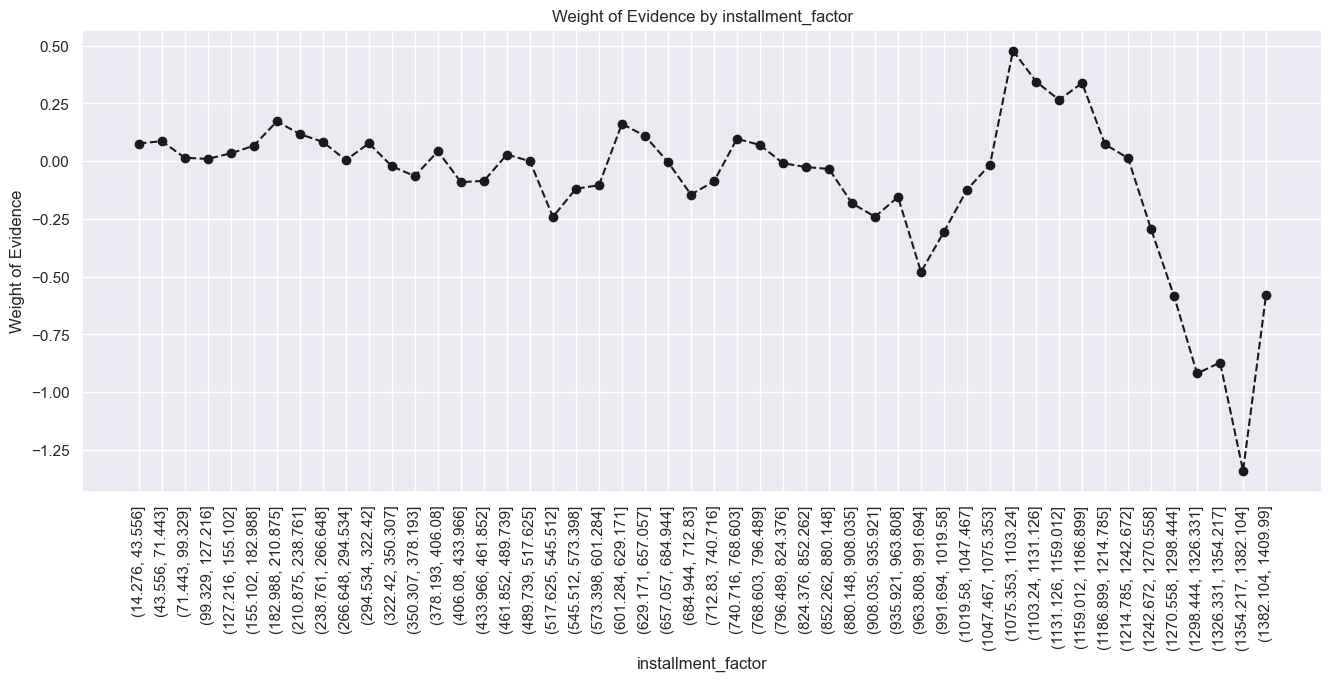

In [96]:
plot_by_woe(df_tempc,rotation_of_x_axis_labels=90)

In [102]:
df_inputs_preps['total_rev_hi_lim_factor'] = pd.cut(df_inputs_preps['total_rev_hi_lim'], 2000)
df_tempc = woe_continuous_ordered(df_inputs_preps, 'total_rev_hi_lim_factor', df_targets_preps)
df_tempc

/Users/joanurima/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,total_rev_hi_lim_factor,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
0,"(-9999.999, 5000.0]",19452,0.865104,0.052146,16828.0,2624.0,0.050648,0.064350,-0.239428,NaN,NaN,inf
1,"(5000.0, 9999.999]",52729,0.875590,0.141354,46169.0,6560.0,0.138958,0.160875,-0.146455,0.010486,0.092974,inf
2,"(9999.999, 14999.998]",59459,0.880775,0.159396,52370.0,7089.0,0.157622,0.173848,-0.097983,0.005185,0.048472,inf
3,"(14999.998, 19999.998]",51367,0.878482,0.137703,45125.0,6242.0,0.135816,0.153076,-0.119637,0.002293,0.021654,inf
4,"(19999.998, 24999.997]",41542,0.887584,0.111364,36872.0,4670.0,0.110976,0.114525,-0.031479,0.009101,0.088158,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


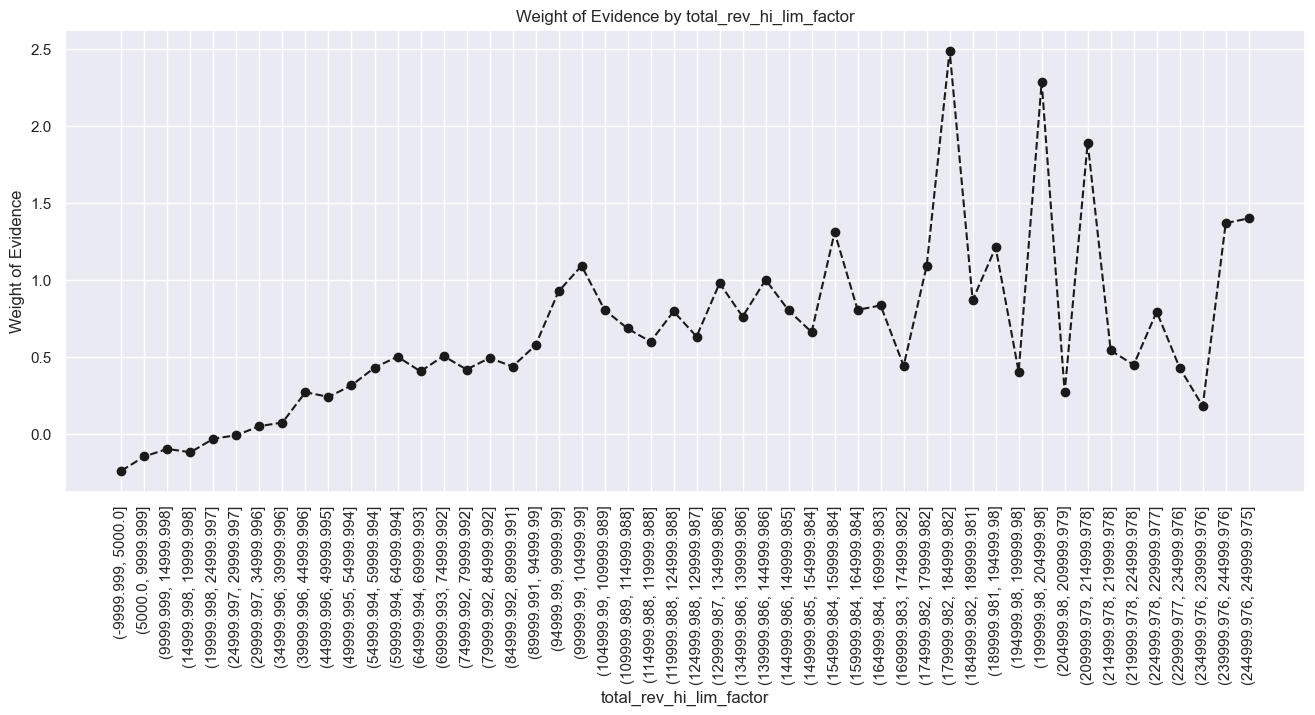

In [103]:
plot_by_woe(df_tempc.iloc[: 50, : ], 90)

In [104]:
df_inputs_preps['total_rev_hi_lim:5k'] =np.where((df_inputs_preps['total_rev_hi_lim'] < 5000),1,0)
df_inputs_preps['total_rev_hi_lim:5k-20k'] =np.where((df_inputs_preps['total_rev_hi_lim'] > 5000) &( df_inputs_preps['total_rev_hi_lim'] <= 20000),1,0)
df_inputs_preps['total_rev_hi_lim:20k-40k'] =np.where((df_inputs_preps['total_rev_hi_lim'] > 20000) &( df_inputs_preps['total_rev_hi_lim'] <= 40000),1,0)
df_inputs_preps['total_rev_hi_lim:40k-65k'] =np.where((df_inputs_preps['total_rev_hi_lim'] > 40000) &( df_inputs_preps['total_rev_hi_lim'] <= 65000),1,0)
df_inputs_preps['total_rev_hi_lim:65k-95k'] =np.where((df_inputs_preps['total_rev_hi_lim'] > 65000) &( df_inputs_preps['total_rev_hi_lim'] <= 95000),1,0)
df_inputs_preps['total_rev_hi_lim:>95k'] =np.where((df_inputs_preps['total_rev_hi_lim'] > 95000),1,0)


In [105]:
df_tempc = woe_continuous_ordered(df_inputs_preps, 'delinq_2yrs', df_targets_preps)
df_tem

,delinq_2yrs,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
0,0.0,306398,0.890489,0.821381,272844.0,33554.0,0.821198,0.822866,-0.002028,NaN,NaN,inf
1,1.0,44995,0.893455,0.120621,40201.0,4794.0,0.120996,0.117566,0.028754,0.002966,0.030783,inf
2,2.0,13089,0.888609,0.035089,11631.0,1458.0,0.035007,0.035755,-0.021164,0.004846,0.049918,inf
3,3.0,4526,0.884224,0.012133,4002.0,524.0,0.012045,0.012850,-0.064715,0.004384,0.043550,inf
4,4.0,1871,0.890433,0.005016,1666.0,205.0,0.005014,0.005027,-0.002602,0.006208,0.062113,inf
5,5.0,982,0.890020,0.002633,874.0,108.0,0.002631,0.002649,-0.006823,0.000413,0.004222,inf
6,6.0,482,0.894191,0.001292,431.0,51.0,0.001297,0.001251,0.036510,0.004171,0.043333,inf
7,7.0,291,0.876289,0.000780,255.0,36.0,0.000767,0.000883,-0.140028,0.017902,0.176538,inf
8,8.0,143,0.902098,0.000383,129.0,14.0,0.000388,0.000343,0.122983,0.025809,0.263010,inf
9,9.0,86,0.906977,0.000231,78.0,8.0,0.000235,0.000196,0.179495,0.004879,0.056512,inf


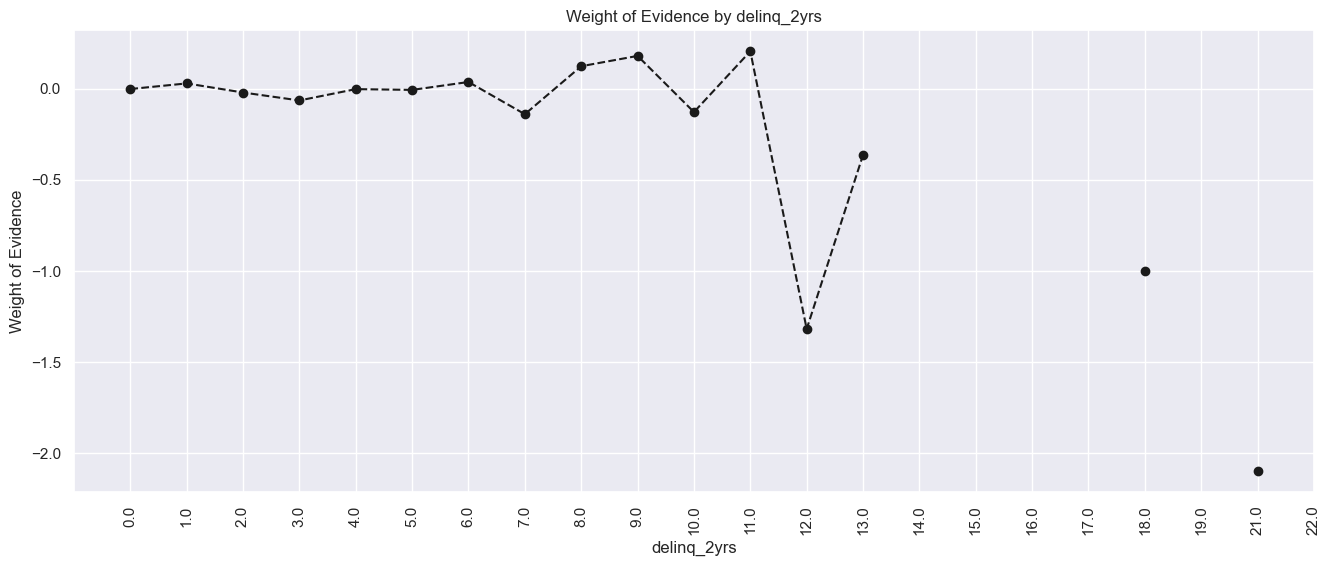

In [106]:
plot_by_woe(df_temp,90)

In [107]:
df_inputs_preps['delinq_2yrs:0'] = np.where((df_inputs_preps['delinq_2yrs'] == 0), 1, 0)
df_inputs_preps['delinq_2yrs:1-3'] = np.where((df_inputs_preps['delinq_2yrs'] >= 1) & (df_inputs_preps['delinq_2yrs'] <= 3), 1, 0)
df_inputs_preps['delinq_2yrs:>=4'] = np.where((df_inputs_preps['delinq_2yrs'] >= 9), 1, 0)

In [108]:
# inq_last_6mths
df_temp = woe_continuous_ordered(df_inputs_preps, 'inq_last_6mths', df_targets_preps)
df_temp

/Users/joanurima/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
0,0.0,193373,0.908808,0.518387,175739.0,17634.0,0.528934,0.432450,0.201399,NaN,NaN,inf
1,1.0,103966,0.884443,0.278708,91952.0,12014.0,0.276755,0.294627,-0.062578,0.024365,0.263977,inf
2,2.0,46209,0.862927,0.123875,39875.0,6334.0,0.120015,0.155333,-0.257955,0.021516,0.195376,inf
3,3.0,20095,0.841851,0.053870,16917.0,3178.0,0.050916,0.077936,-0.425706,0.021076,0.167751,inf
4,4.0,5839,0.846549,0.015653,4943.0,896.0,0.014877,0.021973,-0.389985,0.004698,0.035720,inf
5,5.0,2217,0.827695,0.005943,1835.0,382.0,0.005523,0.009368,-0.528393,0.018854,0.138408,inf
6,6.0,952,0.781513,0.002552,744.0,208.0,0.002239,0.005101,-0.823270,0.046182,0.294876,inf
7,7.0,158,0.658228,0.000424,104.0,54.0,0.000313,0.001324,-1.442366,0.123285,0.619096,inf
8,8.0,95,0.610526,0.000255,58.0,37.0,0.000175,0.000907,-1.648247,0.047702,0.205882,inf
9,9.0,44,0.636364,0.000118,28.0,16.0,0.000084,0.000392,-1.538157,0.025837,0.110091,inf


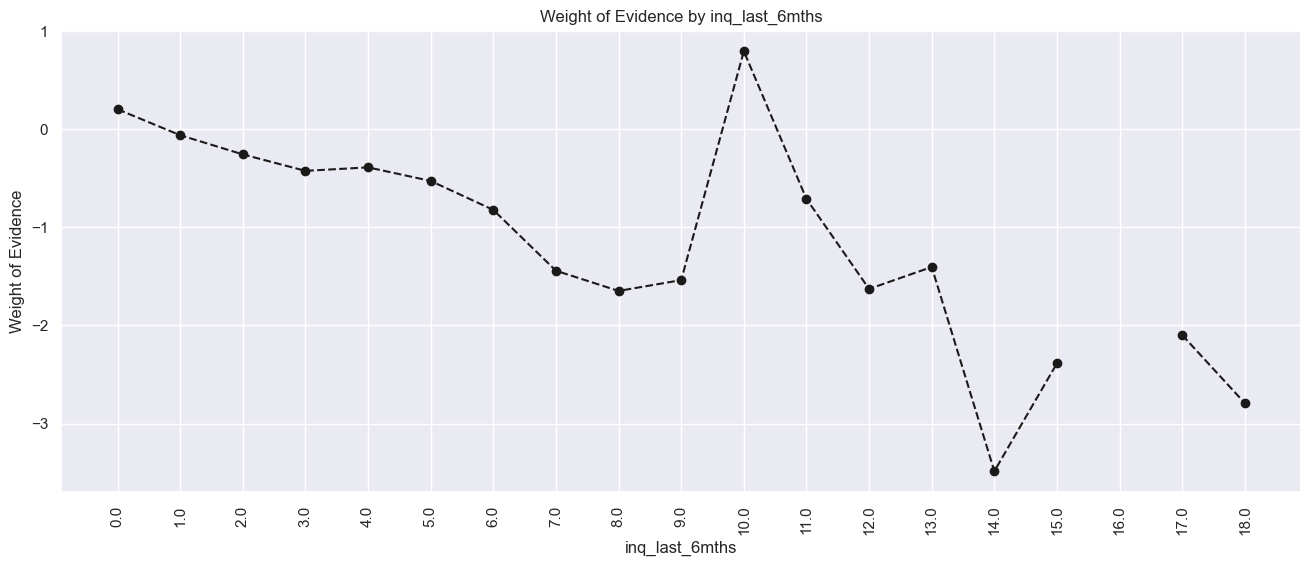

In [109]:
plot_by_woe(df_temp,90)

In [110]:
df_inputs_preps['inq_last_6mths:0'] = np.where((df_inputs_preps['inq_last_6mths'] == 0),1,0)
df_inputs_preps['inq_last_6mths:1-3'] = np.where((df_inputs_preps['inq_last_6mths'].isin(range(1,4))),1,0)
df_inputs_preps['inq_last_6mths:4-6'] = np.where((df_inputs_preps['inq_last_6mths'].isin(range(4,7))),1,0)
df_inputs_preps['inq_last_6mths:>6'] = np.where((df_inputs_preps['inq_last_6mths'] > 6),1,0)


In [111]:
df_temp = woe_continuous_ordered(df_inputs_preps, 'open_acc', df_targets_preps)
df_temp

/Users/joanurima/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good,props_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_woe,IV
0,0.0,28,0.821429,0.000075,23.0,5.0,0.000069,0.000123,-0.571716,NaN,NaN,inf
1,1.0,113,0.884956,0.000303,100.0,13.0,0.000301,0.000319,-0.057552,0.063527,0.514165,inf
2,2.0,1432,0.841480,0.003839,1205.0,227.0,0.003627,0.005567,-0.428488,0.043475,0.370936,inf
3,3.0,4414,0.871998,0.011833,3849.0,565.0,0.011585,0.013856,-0.179030,0.030518,0.249458,inf
4,4.0,10034,0.889476,0.026899,8925.0,1109.0,0.026862,0.027197,-0.012375,0.017478,0.166655,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
56,58.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
57,61.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
58,75.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
59,76.0,2,0.000000,0.000005,0.0,2.0,0.000000,0.000049,-inf,1.000000,inf,inf
